# Grassmann Manifold

Author: Ketson R. M. dos Santos,  
Date: June 3rd, 2020   

This example shows how to use the UQpy Grassmann class to
* perform interpolation on the Grassmann manifold;

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the Grassmann class from UQpy implemented in the DimensionReduction module.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from UQpy.DimensionReduction import Grassmann

Generate the initial samples located at the vertices of a triangle. The coordinates of each vertix are stored in `nodes` and `point` contain the point to be interpolated on the tangent space.

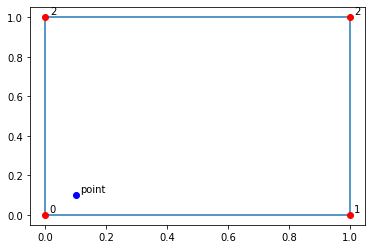

In [2]:
nodes = np.array([[0, 0], [1, 0], [1, 1], [0, 1]]) # node_0, node_1, node_2.
point = np.array([0.1, 0.1]) # Point to interpolate.

plot_ = nodes[0:]
Xplot = plot_.T[0].tolist()
Xplot.append(plot_[0][0])
Yplot = plot_.T[1].tolist()
Yplot.append(plot_[0][1])
plt.plot(Xplot,Yplot)
plt.plot(nodes[0][0],nodes[0][1],'ro')
plt.plot(nodes[1][0],nodes[1][1],'ro')
plt.plot(nodes[2][0],nodes[2][1],'ro')
plt.plot(nodes[3][0],nodes[3][1],'ro')
plt.plot(point[0],point[1],'bo')

dt = 0.015
plt.text(nodes[0][0]+dt,nodes[0][1]+dt,'0')
plt.text(nodes[1][0]+dt,nodes[1][1]+dt,'1')
plt.text(nodes[2][0]+dt,nodes[2][1]+dt,'2')
plt.text(nodes[3][0]+dt,nodes[3][1]+dt,'2')
plt.text(point[0]+dt,point[1]+dt,'point')
plt.show()
plt.close()


Generate three random matrices with reduced rank corresponding to the different samples. The samples are stored in `Solutions`.

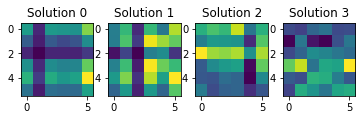

In [3]:
D1 = 6 
r0 = 2  # rank sample 0
r1 = 3  # rank sample 1
r2 = 4  # rank sample 2
r3 = 3  # rank sample 2

np.random.seed(1111) # For reproducibility.
# Solutions: original space.
Sol0 = np.dot(np.random.rand(D1, r0),np.random.rand(r0, D1))
Sol1 = np.dot(np.random.rand(D1, r1),np.random.rand(r1, D1))
Sol2 = np.dot(np.random.rand(D1, r2),np.random.rand(r2, D1))
Sol3 = np.dot(np.random.rand(D1, r3),np.random.rand(r3, D1))

# Creating a list of solutions.
Solutions = [Sol0, Sol1, Sol2, Sol3]

# Plot the solutions
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
ax1.title.set_text('Solution 0')
ax1.imshow(Sol0)
ax2.title.set_text('Solution 1')
ax2.imshow(Sol1)
ax3.title.set_text('Solution 2')
ax3.imshow(Sol2)
ax4.title.set_text('Solution 3')
ax4.imshow(Sol3)
plt.show()

Firs, let's perform the interpolation step-by-step using an object of the ``UQpy.Kriging`` class to interpolate. Further, instatiate the ``UQpy`` class ``Grassmann`` considering the `grassmann_distance` for the distance, `gradient_descent` to estimate the Karcher mean.

In [4]:
from user_interp import my_interp

Gr = Grassmann(distance_method=Grassmann.grassmann_distance, interp_object=my_interp, 
               karcher_method=Grassmann.gradient_descent)

Gr.manifold(p="max", samples=Solutions)

The interpolation implemented in the method `interpolate` is employed herein. In this case, the interpolation is performed considering the full matrices (not elementwise), thus, one can consider that `element_wise = False`.

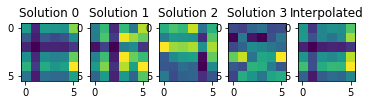

In [5]:

X = Gr.interpolate(coordinates=nodes, point=point, element_wise=False)

# Plot the solutions
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
ax1.title.set_text('Solution 0')
ax1.imshow(Sol0)
ax2.title.set_text('Solution 1')
ax2.imshow(Sol1)
ax3.title.set_text('Solution 2')
ax3.imshow(Sol2)
ax4.title.set_text('Solution 3')
ax4.imshow(Sol3)
ax5.title.set_text('Interpolated')
ax5.imshow(X)
plt.show()

Now, let's use an object of sklearn.gaussiann_process. (To run this example, you have to install the scikit learn toolbox in advance.)

In [6]:
from sklearn.gaussian_process import GaussianProcessRegressor
gp = GaussianProcessRegressor()

# Instantiate the method again with: interp_object=gp.
Gr = Grassmann(distance_method=Grassmann.grassmann_distance, interp_object=gp, karcher_method=Grassmann.gradient_descent)

Gr.manifold(p='max', samples=Solutions)
X = Gr.interpolate(coordinates=nodes, point=[point], element_wise=True)

Plot the solution.

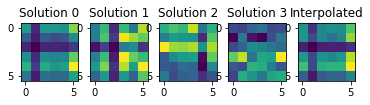

In [7]:

# Plot the solutions
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
ax1.title.set_text('Solution 0')
ax1.imshow(Sol0)
ax2.title.set_text('Solution 1')
ax2.imshow(Sol1)
ax3.title.set_text('Solution 2')
ax3.imshow(Sol2)
ax4.title.set_text('Solution 3')
ax4.imshow(Sol3)
ax5.title.set_text('Interpolated')
ax5.imshow(X)
plt.show()